In [4]:
!pip install mne #If you don't already have it

In [1]:
from Dataloader import dataloader
from MakeDict import findEDF
from MNEplotter import MNEPlotter 

In [2]:

#make your own phats
data_path=r"C:\Users\Andre\Desktop\Deeplearning local\artifact_dataset\artifact_dataset"
path=r"artifact_dataset"

edfDict=findEDF(DataDir=data_path)

In [5]:
#Initialise dataloader
DL=dataloader(Time_interval=1,Overlap=0.75,Data_paht=data_path)
lables_decoding=DL.one_hot_eoncoding

In [6]:
#Find all atifacts in dataset takes 2 minutes
edfDict,annothlist=DL.anno_mapping(edfDict) 

ValueError: range() arg 3 must not be zero

annotation list dimension lable*windows with that lable each data data is savede as a list of [file id,window id]

In [5]:
#So save it
np.save('name.npy',annothlist)

NameError: name 'annothlist' is not defined

In [10]:
#Or load it
annothlist=np.load('testIDX.npy',allow_pickle=True)

In [7]:
np.shape(annothlist)

(7,)

In [11]:
#Couldent find anywere bether to place it
def make_batch(IDXlist, size=24, Nlable=6):
    """
    make balance dataset, sampling with replacement.
    
    """
    filelist = []
    windowlist = []

    if size % Nlable != 0:
        raise Exception(f"Batch size must be devedible by {Nlable}")
    fromset = int(size / Nlable)

    for i in range(Nlable):
        elements = np.random.randint(0, len(IDXlist[i]), fromset)
        for e in elements:
            window = int(IDXlist[i][e][0])
            try:  # See if window already is in list else append it
                winidx = windowlist.index(window)
                filelist[winidx].append(int(IDXlist[i][e][1]))
            except ValueError:
                windowlist.append(window)
                filelist.append([int(IDXlist[i][e][1])])

    return windowlist, filelist

In [12]:
windowlist,filelist=make_batch(annothlist,12)

In [13]:
Batch,Batch_X,Batch_Y=DL.loadBatch(edfDict=edfDict,filelist=filelist,windowlist=windowlist)

Extracting EDF parameters from C:\Users\Andre\Desktop\Deeplearning local\artifact_dataset\artifact_dataset\01_tcp_ar\082\00008295\s001_2011_11_07\00008295_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 417749  =      0.000 ...  1670.996 secs...
EMG-REF
PHOTIC-REF
IBI
BURSTS
SUPPR
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
19
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from C:\Users\Andre\Desktop\Deeplearning local\artifact_dataset\artifact_dataset\01_tcp_ar\073\00007383\s001_2010_02_25\00007383_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300249  =      0.000 ...  1200.996 secs...
EMG-REF
PHOTIC-REF
IBI
BURSTS
SUPPR
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3

In [9]:
print(np.shape(Batch_X))
print(np.shape(Batch_Y))

(12, 19, 250)
(12, 6)


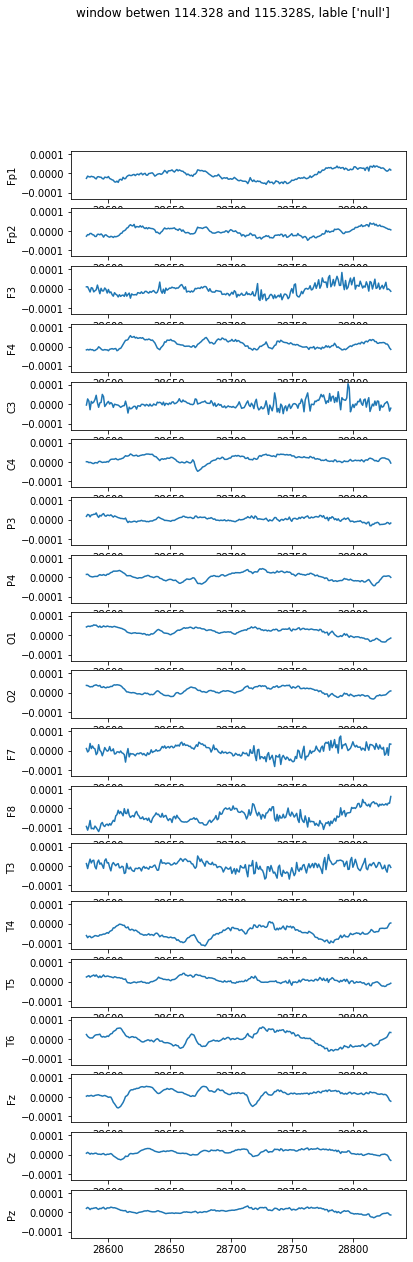

In [14]:
ploter=MNEPlotter(CH_names=DL.CH_names,lableEncoding=DL.one_hot_eoncoding) #Intitalic plotter
ploter.plot(window=Batch[0])

In [20]:
ploter.plot()

[-7.43667907e-06 -2.97944405e-06 -5.71002797e-06 -4.69003328e-06
  3.43720736e-06 -8.91400865e-07 -5.99914165e-06 -4.24833183e-06
 -7.07528698e-06 -1.10746269e-05 -1.35241280e-05 -1.59413737e-05
 -1.30824266e-05 -1.10264412e-05 -1.38132417e-05 -1.31225154e-05
 -1.49857583e-05 -1.79330456e-05 -1.57567281e-05 -1.64232298e-05
 -2.34664260e-05 -2.56507745e-05 -2.38358490e-05 -2.69116313e-05
 -2.89676167e-05 -2.41489896e-05 -2.58757066e-05 -3.13768314e-05
 -3.16499491e-05 -2.88792105e-05 -2.97144937e-05 -2.87185918e-05
 -3.35452498e-05 -3.39467307e-05 -3.46936736e-05 -2.96341184e-05
 -2.85580390e-05 -3.01641601e-05 -2.53215720e-05 -2.77950342e-05
 -2.19164555e-05 -2.17075852e-05 -2.02460209e-05 -1.85755205e-05
 -2.24464972e-05 -1.60698686e-05 -1.59494705e-05 -1.73628492e-05
 -1.24881374e-05 -1.50579708e-05 -1.43272216e-05 -8.48063475e-06
 -7.31621504e-06 -9.01067648e-06 -8.17552512e-06 -9.97438872e-06
 -1.06651151e-05 -9.84589376e-06 -1.62707079e-05 -1.51061564e-05
 -1.14119921e-05 -1.06329

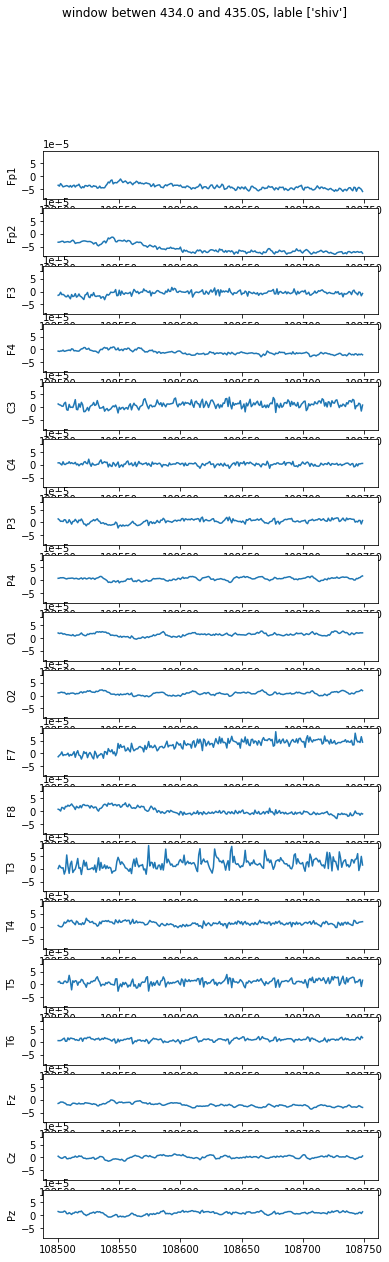

In [14]:
ploter.plot(window=Batch[6])